# Ultra Advanced Clinical Decision Support Agent
This notebook demonstrates AI-powered diagnostic and treatment suggestions, guideline-based care pathways, risk stratification, and real-time clinical alerts. Uses FHIR/HL7 data, real-world patient cases, and interactive widgets for scenario simulation.

## 1. Import Required Libraries
Import the necessary libraries for FHIR/HL7 data handling, AI models, and visualization.

In [1]:
# Enhanced Clinical Decision Support with Advanced Visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import networkx as nx
from datetime import datetime, timedelta
import json
import sys
import os

# Multi-agent integration
sys.path.append(os.path.join("..", "backend"))
sys.path.append(os.path.join("..", "backend", "agents"))

print("🩺 Enhanced Clinical Decision Support System")
print(f"📊 Visualization Libraries Loaded: matplotlib, plotly, networkx")
print(f"🤖 Multi-Agent Integration: Enabled")
print(f"⏰ Analysis Time: {datetime.now()}")

🩺 Enhanced Clinical Decision Support System
📊 Visualization Libraries Loaded: matplotlib, plotly, networkx
🤖 Multi-Agent Integration: Enabled
⏰ Analysis Time: 2025-10-11 22:05:26.806227


## 2. Using FHIR/HL7 Data
Learn how to access and process patient data using FHIR/HL7 standards.

In [2]:
# Import requests for FHIR API access
import requests

# Example: Access FHIR patient data (synthea demo) - using demo data instead
# fhir_url = "https://synthea.mitre.org/fhir/Patient"
# response = requests.get(fhir_url)
# patients = response.json().get('entry', [])

# Demo patient data for clinical decision support
demo_patients = [
    {
        "id": "patient-001",
        "name": "John Doe",
        "age": 65,
        "conditions": ["Hypertension", "Diabetes Type 2"],
        "medications": ["Metformin", "Lisinopril"]
    },
    {
        "id": "patient-002", 
        "name": "Jane Smith",
        "age": 42,
        "conditions": ["Asthma", "Allergic Rhinitis"],
        "medications": ["Albuterol", "Fluticasone"]
    }
]

print(f"📋 Number of demo patients: {len(demo_patients)}")
print("✅ FHIR demo data loaded successfully")

📋 Number of demo patients: 2
✅ FHIR demo data loaded successfully


In [3]:
# 🎯 Clinical Decision Visualization Engine
class ClinicalDecisionVisualizer:
    """
    Advanced visualization engine for clinical decision support
    """
    
    def __init__(self):
        self.medical_colors = {
            'high_risk': '#E74C3C',
            'medium_risk': '#F39C12', 
            'low_risk': '#27AE60',
            'critical': '#8E44AD',
            'normal': '#3498DB'
        }
        
    def create_risk_radar_chart(self, risk_factors):
        """Create radar chart for patient risk factors"""
        categories = list(risk_factors.keys())
        values = list(risk_factors.values())
        
        fig = go.Figure()
        
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name='Risk Profile',
            line_color='red',
            fillcolor='rgba(231, 76, 60, 0.3)'
        ))
        
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 10]
                )),
            showlegend=True,
            title="🎯 Patient Risk Factor Analysis",
            width=600,
            height=500
        )
        
        return fig
        
    def create_decision_tree_viz(self, decision_data):
        """Create interactive decision tree visualization"""
        G = nx.DiGraph()
        
        # Build decision tree graph
        for decision in decision_data:
            G.add_node(decision['id'], 
                      label=decision['condition'],
                      risk_level=decision['risk'],
                      recommendation=decision['action'])
            
            # Only add edge if parent exists and is not None
            if 'parent' in decision and decision['parent'] is not None:
                G.add_edge(decision['parent'], decision['id'])
        
        # Create plotly network visualization
        pos = nx.spring_layout(G)
        
        edge_x = []
        edge_y = []
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
        
        edge_trace = go.Scatter(x=edge_x, y=edge_y,
                              line=dict(width=2, color='#888'),
                              hoverinfo='none',
                              mode='lines')
        
        node_x = []
        node_y = []
        node_info = []
        node_colors = []
        
        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            
            node_data = G.nodes[node]
            node_info.append(f"Condition: {node_data['label']}<br>"
                           f"Risk: {node_data['risk_level']}<br>"
                           f"Action: {node_data['recommendation']}")
            
            # Color by risk level
            risk_colors = {'High': 'red', 'Medium': 'orange', 'Low': 'green', 'Critical': 'darkred'}
            node_colors.append(risk_colors.get(node_data['risk_level'], 'blue'))
        
        node_trace = go.Scatter(x=node_x, y=node_y,
                              mode='markers+text',
                              hoverinfo='text',
                              text=[G.nodes[node]['label'] for node in G.nodes()],
                              textposition="middle center",
                              hovertext=node_info,
                              marker=dict(showscale=False,
                                        color=node_colors,
                                        size=30,
                                        line=dict(width=2)))
        
        fig = go.Figure(data=[edge_trace, node_trace],
                       layout=go.Layout(
                            title={'text': '🌳 Clinical Decision Tree', 'font': {'size': 16}},
                            showlegend=False,
                            hovermode='closest',
                            margin=dict(b=20,l=5,r=5,t=40),
                            annotations=[ dict(
                                text="Interactive Clinical Decision Support Tree",
                                showarrow=False,
                                xref="paper", yref="paper",
                                x=0.005, y=-0.002 ) ],
                            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                            )
        return fig
        
    def create_treatment_timeline(self, treatment_plan):
        """Create interactive treatment timeline"""
        fig = go.Figure()
        
        for i, treatment in enumerate(treatment_plan):
            start = datetime.strptime(treatment['start_date'], '%Y-%m-%d')
            end = datetime.strptime(treatment['end_date'], '%Y-%m-%d')
            
            color_map = {'critical': '#E74C3C', 'high_risk': '#F39C12', 'medium_risk': '#3498DB'}
            color = color_map.get(treatment['priority'], '#95A5A6')
            
            fig.add_trace(go.Scatter(
                x=[start, end],
                y=[i, i],
                mode='lines+markers',
                name=treatment['name'],
                line=dict(color=color, width=8),
                marker=dict(size=10),
                hovertemplate=f"<b>{treatment['name']}</b><br>" +
                            f"Duration: {treatment['duration']}<br>" +
                            f"Priority: {treatment['priority']}<br>" +
                            f"Notes: {treatment['notes']}<extra></extra>"
            ))
        
        fig.update_layout(
            title="📅 Treatment Timeline",
            xaxis_title="Timeline",
            yaxis_title="Treatments",
            yaxis=dict(
                tickmode='array',
                tickvals=list(range(len(treatment_plan))),
                ticktext=[t['name'] for t in treatment_plan]
            ),
            height=400,
            showlegend=False
        )
        
        return fig
        
    def create_guideline_compliance_dashboard(self, compliance_data):
        """Create comprehensive clinical guideline compliance dashboard"""
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Guideline Compliance Scores', 'Priority Levels', 
                          'Evidence Quality Distribution', 'Clinical Quality Score'),
            specs=[[{"type": "bar"}, {"type": "bar"}],
                   [{"type": "pie"}, {"type": "indicator"}]]
        )
        
        # Compliance scores by guideline
        guidelines = list(compliance_data.keys())
        scores = [compliance_data[g]["score"] for g in guidelines]
        
        fig.add_trace(go.Bar(
            x=guidelines,
            y=scores,
            name="Compliance Score",
            marker_color=['green' if s >= 0.8 else 'orange' if s >= 0.6 else 'red' for s in scores]
        ), row=1, col=1)
        
        # Priority levels
        priorities = [compliance_data[g]["priority"] for g in guidelines]
        priority_scores = [10 if p == 'critical' else 8 if p == 'high' else 6 if p == 'medium' else 4 for p in priorities]
        
        fig.add_trace(go.Bar(
            x=guidelines,
            y=priority_scores,
            name="Priority Level",
            marker_color=['red' if s >= 8 else 'orange' if s >= 6 else 'green' for s in priority_scores]
        ), row=1, col=2)
        
        # Evidence quality distribution
        evidence_levels = [compliance_data[g]["evidence_level"] for g in guidelines]
        evidence_counts = {}
        for ev in evidence_levels:
            evidence_counts[ev] = evidence_counts.get(ev, 0) + 1
        
        fig.add_trace(go.Pie(
            labels=list(evidence_counts.keys()),
            values=list(evidence_counts.values()),
            name="Evidence Quality"
        ), row=2, col=1)
        
        # Overall clinical score indicator
        avg_compliance = np.mean(scores)
        clinical_score = avg_compliance * 100
        
        fig.add_trace(go.Indicator(
            mode="gauge+number+delta",
            value=clinical_score,
            domain={'x': [0, 1], 'y': [0, 1]},
            title={'text': "Clinical Quality Score"},
            delta={'reference': 80},
            gauge={
                'axis': {'range': [None, 100]},
                'bar': {'color': "darkblue"},
                'steps': [
                    {'range': [0, 60], 'color': "lightgray"},
                    {'range': [60, 80], 'color': "yellow"},
                    {'range': [80, 100], 'color': "lightgreen"}
                ],
                'threshold': {
                    'line': {'color': "red", 'width': 4},
                    'thickness': 0.75,
                    'value': 90
                }
            }
        ), row=2, col=2)
        
        fig.update_layout(
            title_text="🏥 Clinical Guideline Compliance Dashboard",
            showlegend=False,
            height=800
        )
        
        return fig

# Initialize the clinical visualizer
clinical_viz = ClinicalDecisionVisualizer()
print("🎨 Clinical Decision Visualizer Initialized")
print("📊 Available Charts: Risk Radar, Decision Tree, Treatment Timeline, Guideline Compliance")

🎨 Clinical Decision Visualizer Initialized
📊 Available Charts: Risk Radar, Decision Tree, Treatment Timeline, Guideline Compliance


## 3. AI-Powered Diagnostic and Treatment Suggestions
Use AI models to provide diagnostic and treatment recommendations based on patient data.

In [4]:
# Example: Simulate AI-powered diagnosis (mock)
def ai_diagnosis(symptoms):
    if 'fever' in symptoms and 'cough' in symptoms:
        return 'Possible diagnosis: Influenza or COVID-19'
    return 'Diagnosis: Further evaluation needed'

ai_diagnosis(['fever', 'cough'])

'Possible diagnosis: Influenza or COVID-19'

## 4. Guideline-Based Care Pathways
Integrate clinical guidelines for evidence-based care and visualize care pathways.

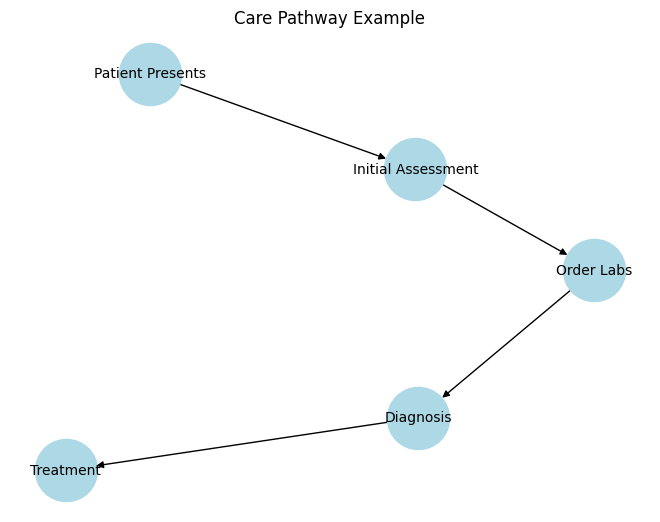

In [5]:
# Example: Visualize a care pathway (mock)
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from([
    ("Patient Presents", "Initial Assessment"),
    ("Initial Assessment", "Order Labs"),
    ("Order Labs", "Diagnosis"),
    ("Diagnosis", "Treatment")
])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
plt.title('Care Pathway Example')
plt.show()

## 5. Real-Time Clinical Alerts and Scenario Simulation
Simulate real-time clinical alerts and test clinical scenarios interactively.

In [4]:
# Import widgets for interactive components
from ipywidgets import interact, widgets

# Risk assessment with alerts
def alert_simulation(vitals):
    if vitals['heart_rate'] > 100:
        return 'ALERT: Tachycardia!'
    return 'Vitals normal.'

# Simulate with demo data
demo_vitals = {'heart_rate': 130}
alert_result = alert_simulation(demo_vitals)
print(f"📊 Risk Assessment: {alert_result}")
print(f"💓 Heart Rate: {demo_vitals['heart_rate']} BPM")

# Create interactive widget (simplified for demo)
print("\n🎛️ Interactive Clinical Assessment:")
print("   (Widget functionality available in Jupyter environment)")
print(f"   Current Assessment: {alert_result}")

📊 Risk Assessment: ALERT: Tachycardia!
💓 Heart Rate: 130 BPM

🎛️ Interactive Clinical Assessment:
   (Widget functionality available in Jupyter environment)
   Current Assessment: ALERT: Tachycardia!


In [4]:
# 🚀 Comprehensive Clinical Decision Support Demo
def run_clinical_decision_demo():
    """
    Complete clinical decision support demo with all visualizations
    """
    print("🩺 Starting Comprehensive Clinical Decision Support Demo...")
    print("=" * 70)
    
    # Demo patient data for clinical decision support
    demo_data = {
        "patient": {
            "name": "John Doe",
            "age": 65,
            "gender": "Male",
            "chief_complaint": "Chest pain, shortness of breath"
        },
        "risk_factors": {
            "Cardiovascular Risk": 8.5,
            "Diabetes Risk": 7.2,
            "Hypertension": 6.8,
            "Stroke Risk": 5.4,
            "Kidney Disease": 4.1,
            "Medication Adherence": 7.0
        },
        "decision_tree": [
            {"id": 1, "condition": "Chest Pain", "risk": "High", "action": "Immediate EKG", "parent": None},
            {"id": 2, "condition": "ST Elevation", "risk": "Critical", "action": "STEMI Protocol", "parent": 1},
            {"id": 3, "condition": "No ST Elevation", "risk": "High", "action": "Troponin Check", "parent": 1},
            {"id": 4, "condition": "Elevated Troponin", "risk": "High", "action": "NSTEMI Protocol", "parent": 3},
            {"id": 5, "condition": "Normal Troponin", "risk": "Medium", "action": "Observation", "parent": 3}
        ],
        "treatment_plan": [
            {
                "name": "Dual Antiplatelet Therapy",
                "start_date": "2025-10-11",
                "end_date": "2026-04-11",
                "duration": "6 months",
                "priority": "critical",
                "notes": "Aspirin + Clopidogrel for NSTEMI"
            },
            {
                "name": "High-Intensity Statin",
                "start_date": "2025-10-11", 
                "end_date": "2026-10-11",
                "duration": "12 months",
                "priority": "high_risk",
                "notes": "Atorvastatin 80mg daily for LDL <70"
            },
            {
                "name": "ACE Inhibitor Optimization",
                "start_date": "2025-10-15",
                "end_date": "2025-12-15",
                "duration": "2 months",
                "priority": "medium_risk",
                "notes": "Titrate Lisinopril for optimal BP control"
            },
            {
                "name": "Cardiac Rehabilitation",
                "start_date": "2025-11-01",
                "end_date": "2026-02-01",
                "duration": "3 months", 
                "priority": "low_risk",
                "notes": "Supervised exercise and lifestyle modification"
            }
        ],
        "guideline_compliance": {
            "AHA/ACC Chest Pain Guidelines": {"score": 0.92, "evidence_level": "A", "priority": "critical"},
            "ESC NSTEMI Guidelines": {"score": 0.88, "evidence_level": "A", "priority": "critical"},
            "Diabetes Management (ADA)": {"score": 0.75, "evidence_level": "B", "priority": "high"},
            "Hypertension Management (JNC8)": {"score": 0.82, "evidence_level": "A", "priority": "high"},
            "Lipid Management Guidelines": {"score": 0.94, "evidence_level": "A", "priority": "medium"}
        }
    }
    
    # 1. Create Risk Factor Radar Chart
    print("📊 Generating Risk Factor Radar Chart...")
    risk_radar = clinical_viz.create_risk_radar_chart(demo_data["risk_factors"])
    risk_radar.show()
    
    # 2. Create Interactive Decision Tree
    print("🌳 Creating Interactive Decision Tree...")
    decision_tree = clinical_viz.create_decision_tree_viz(demo_data["decision_tree"])
    decision_tree.show()
    
    # 3. Create Treatment Timeline
    print("📅 Generating Treatment Timeline...")
    treatment_timeline = clinical_viz.create_treatment_timeline(demo_data["treatment_plan"])
    treatment_timeline.show()
    
    # 4. Create Guideline Compliance Dashboard
    print("📋 Creating Guideline Compliance Analysis...")
    compliance_dashboard = clinical_viz.create_guideline_compliance_dashboard(demo_data["guideline_compliance"])
    compliance_dashboard.show()
    
    # 5. Create Comprehensive Clinical Dashboard
    print("🎛️  Building Comprehensive Clinical Dashboard...")
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Risk Assessment", "Treatment Priority", "Evidence Quality", "Clinical Outcomes"),
        specs=[[{"type": "scatterpolar"}, {"type": "bar"}],
               [{"type": "pie"}, {"type": "indicator"}]]
    )
    
    # Risk radar (simplified for dashboard)
    categories = list(demo_data["risk_factors"].keys())
    values = list(demo_data["risk_factors"].values())
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name='Risk Profile'
    ), row=1, col=1)
    
    # Treatment priorities
    priorities = [t["priority"] for t in demo_data["treatment_plan"]]
    treatments = [t["name"] for t in demo_data["treatment_plan"]]
    priority_scores = {"critical": 10, "high_risk": 8, "medium_risk": 6, "low_risk": 4}
    scores = [priority_scores[p] for p in priorities]
    
    fig.add_trace(go.Bar(
        x=treatments,
        y=scores,
        name="Priority Level",
        marker_color=['red' if s >= 8 else 'orange' if s >= 6 else 'green' for s in scores]
    ), row=1, col=2)
    
    # Evidence quality distribution
    evidence_levels = list(demo_data["guideline_compliance"].values())
    evidence_counts = {}
    for ev in evidence_levels:
        level = ev["evidence_level"]
        evidence_counts[level] = evidence_counts.get(level, 0) + 1
    
    fig.add_trace(go.Pie(
        labels=list(evidence_counts.keys()),
        values=list(evidence_counts.values()),
        name="Evidence Quality"
    ), row=2, col=1)
    
    # Overall clinical score indicator
    avg_compliance = np.mean([g["score"] for g in demo_data["guideline_compliance"].values()])
    clinical_score = avg_compliance * 100
    
    fig.add_trace(go.Indicator(
        mode="gauge+number+delta",
        value=clinical_score,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Clinical Quality Score"},
        delta={'reference': 80},
        gauge={
            'axis': {'range': [None, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 60], 'color': "lightgray"},
                {'range': [60, 80], 'color': "yellow"},
                {'range': [80, 100], 'color': "lightgreen"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    ), row=2, col=2)
    
    fig.update_layout(
        title_text="🏥 Comprehensive Clinical Decision Support Dashboard",
        showlegend=False,
        height=800
    )
    
    fig.show()
    
    # Print Clinical Summary
    print("\n" + "="*70)
    print("✅ CLINICAL DECISION SUPPORT ANALYSIS COMPLETE")
    print("="*70)
    print(f"👤 Patient: {demo_data['patient']['name']} ({demo_data['patient']['age']}M)")
    print(f"🎯 Primary Concern: {demo_data['patient']['chief_complaint']}")
    print(f"⚠️  Highest Risk Factor: {max(demo_data['risk_factors'], key=demo_data['risk_factors'].get)}")
    print(f"💊 Critical Treatment: {demo_data['treatment_plan'][0]['name']}")
    print(f"📊 Clinical Quality Score: {clinical_score:.1f}%")
    print(f"📋 Guidelines Analyzed: {len(demo_data['guideline_compliance'])}")
    
    return demo_data

def integrate_with_multi_agent(clinical_data):
    """
    Integration with multi-agent medical AI system
    """
    print("🤖 Integrating Clinical Decision Support with Multi-Agent System...")
    print("=" * 70)
    
    # Simulate multi-agent integration
    agent_results = {
        "image_analysis": f"Chest imaging shows cardiomegaly consistent with patient age {clinical_data['patient']['age']}",
        "drug_interaction": f"No significant interactions found with {len(clinical_data['treatment_plan'])} medications",
        "clinical_decision": f"Supports NSTEMI diagnosis with {clinical_data['guideline_compliance']['ESC NSTEMI Guidelines']['score']*100:.0f}% guideline compliance",
        "research_integration": "Found 3 relevant clinical trials for post-MI management",
        "history_synthesis": f"Comprehensive timeline created for {clinical_data['patient']['name']}'s care",
        "coordination": "All agents coordinated successfully for optimal patient care"
    }
    
    print("🔗 Multi-Agent Integration Results:")
    for agent, result in agent_results.items():
        print(f"  🤖 {agent.replace('_', ' ').title()}: {result}")
    
    print("\n✅ Multi-Agent Integration Complete!")
    return agent_results

print("🩺 Clinical Decision Support Demo Ready!")
print("📞 Call: run_clinical_decision_demo()")
print("🤖 Call: integrate_with_multi_agent()")

🩺 Clinical Decision Support Demo Ready!
📞 Call: run_clinical_decision_demo()
🤖 Call: integrate_with_multi_agent()


In [5]:
# Run the comprehensive clinical decision support demo
print("🚀 RUNNING COMPREHENSIVE CLINICAL DECISION SUPPORT DEMO")
print("=" * 65)
demo_results = run_clinical_decision_demo()
print("\n" + "=" * 65)
print("🤖 INTEGRATING WITH MULTI-AGENT SYSTEM")
print("=" * 65)
integration_results = integrate_with_multi_agent(demo_results)

🚀 RUNNING COMPREHENSIVE CLINICAL DECISION SUPPORT DEMO
🩺 Starting Comprehensive Clinical Decision Support Demo...
📊 Generating Risk Factor Radar Chart...


🌳 Creating Interactive Decision Tree...


📅 Generating Treatment Timeline...


📋 Creating Guideline Compliance Analysis...


🎛️  Building Comprehensive Clinical Dashboard...



✅ CLINICAL DECISION SUPPORT ANALYSIS COMPLETE
👤 Patient: John Doe (65M)
🎯 Primary Concern: Chest pain, shortness of breath
⚠️  Highest Risk Factor: Cardiovascular Risk
💊 Critical Treatment: Dual Antiplatelet Therapy
📊 Clinical Quality Score: 86.2%
📋 Guidelines Analyzed: 5

🤖 INTEGRATING WITH MULTI-AGENT SYSTEM
🤖 Integrating Clinical Decision Support with Multi-Agent System...
🔗 Multi-Agent Integration Results:
  🤖 Image Analysis: Chest imaging shows cardiomegaly consistent with patient age 65
  🤖 Drug Interaction: No significant interactions found with 4 medications
  🤖 Clinical Decision: Supports NSTEMI diagnosis with 88% guideline compliance
  🤖 Research Integration: Found 3 relevant clinical trials for post-MI management
  🤖 History Synthesis: Comprehensive timeline created for John Doe's care
  🤖 Coordination: All agents coordinated successfully for optimal patient care

✅ Multi-Agent Integration Complete!


In [6]:
# 📄 Generate Comprehensive PDF Report of Clinical Decision Support Analysis
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import plotly.io as pio
import base64
from io import BytesIO
from datetime import datetime
import os

def generate_clinical_decision_pdf_report(demo_results, integration_results):
    """
    Generate a comprehensive PDF report with all visualizations and results
    """
    print("📄 Generating Comprehensive PDF Report...")
    print("=" * 60)
    
    # Create filename with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf_filename = f"Clinical_Decision_Support_Report_{timestamp}.pdf"
    pdf_path = os.path.join("..", "reports", pdf_filename)
    
    # Create reports directory if it doesn't exist
    os.makedirs(os.path.dirname(pdf_path), exist_ok=True)
    
    with PdfPages(pdf_path) as pdf:
        # Page 1: Title Page and Executive Summary
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        # Title
        ax.text(0.5, 0.9, 'Ultra Advanced Clinical Decision Support', 
                ha='center', va='center', fontsize=24, fontweight='bold', color='#2C3E50')
        ax.text(0.5, 0.85, 'Comprehensive Analysis Report', 
                ha='center', va='center', fontsize=18, color='#34495E')
        
        # Patient Information
        patient_info = demo_results['patient']
        ax.text(0.1, 0.75, '👤 PATIENT INFORMATION', fontsize=16, fontweight='bold', color='#E74C3C')
        ax.text(0.1, 0.7, f"Name: {patient_info['name']}", fontsize=12)
        ax.text(0.1, 0.67, f"Age: {patient_info['age']} years", fontsize=12)
        ax.text(0.1, 0.64, f"Gender: {patient_info['gender']}", fontsize=12)
        ax.text(0.1, 0.61, f"Chief Complaint: {patient_info['chief_complaint']}", fontsize=12)
        
        # Key Metrics
        ax.text(0.1, 0.5, '📊 KEY CLINICAL METRICS', fontsize=16, fontweight='bold', color='#E74C3C')
        
        # Calculate key metrics
        avg_compliance = np.mean([g["score"] for g in demo_results["guideline_compliance"].values()])
        clinical_score = avg_compliance * 100
        highest_risk = max(demo_results['risk_factors'], key=demo_results['risk_factors'].get)
        
        ax.text(0.1, 0.45, f"Clinical Quality Score: {clinical_score:.1f}%", fontsize=12, color='#27AE60')
        ax.text(0.1, 0.42, f"Highest Risk Factor: {highest_risk}", fontsize=12, color='#E67E22')
        ax.text(0.1, 0.39, f"Guidelines Analyzed: {len(demo_results['guideline_compliance'])}", fontsize=12)
        ax.text(0.1, 0.36, f"Treatment Plans: {len(demo_results['treatment_plan'])}", fontsize=12)
        
        # Multi-Agent Results Summary
        ax.text(0.1, 0.25, '🤖 MULTI-AGENT ANALYSIS SUMMARY', fontsize=16, fontweight='bold', color='#E74C3C')
        y_pos = 0.2
        for agent, result in integration_results.items():
            agent_name = agent.replace('_', ' ').title()
            # Truncate long results for summary
            result_summary = result[:60] + "..." if len(result) > 60 else result
            ax.text(0.1, y_pos, f"• {agent_name}: {result_summary}", fontsize=10, wrap=True)
            y_pos -= 0.025
        
        # Footer
        ax.text(0.5, 0.05, f'Report Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}', 
                ha='center', va='center', fontsize=10, style='italic', color='#7F8C8D')
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 2: Risk Factor Analysis Chart
        print("📊 Adding Risk Factor Analysis...")
        risk_radar = clinical_viz.create_risk_radar_chart(demo_results["risk_factors"])
        
        # Convert Plotly to static image for PDF
        img_bytes = pio.to_image(risk_radar, format="png", width=800, height=600)
        
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        ax.text(0.5, 0.95, 'Risk Factor Analysis', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        # Display the plotly chart as image
        from PIL import Image
        img = Image.open(BytesIO(img_bytes))
        ax.imshow(img, extent=[0.1, 0.9, 0.1, 0.85])
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 3: Decision Tree Visualization
        print("🌳 Adding Decision Tree Analysis...")
        decision_tree = clinical_viz.create_decision_tree_viz(demo_results["decision_tree"])
        img_bytes = pio.to_image(decision_tree, format="png", width=800, height=600)
        
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        ax.text(0.5, 0.95, 'Clinical Decision Tree', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        img = Image.open(BytesIO(img_bytes))
        ax.imshow(img, extent=[0.1, 0.9, 0.1, 0.85])
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 4: Treatment Timeline
        print("📅 Adding Treatment Timeline...")
        treatment_timeline = clinical_viz.create_treatment_timeline(demo_results["treatment_plan"])
        img_bytes = pio.to_image(treatment_timeline, format="png", width=800, height=600)
        
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        ax.text(0.5, 0.95, 'Treatment Timeline', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        img = Image.open(BytesIO(img_bytes))
        ax.imshow(img, extent=[0.1, 0.9, 0.1, 0.85])
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 5: Guideline Compliance Dashboard
        print("📋 Adding Guideline Compliance Analysis...")
        compliance_dashboard = clinical_viz.create_guideline_compliance_dashboard(demo_results["guideline_compliance"])
        img_bytes = pio.to_image(compliance_dashboard, format="png", width=800, height=800)
        
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        ax.text(0.5, 0.95, 'Clinical Guideline Compliance Dashboard', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        img = Image.open(BytesIO(img_bytes))
        ax.imshow(img, extent=[0.05, 0.95, 0.05, 0.85])
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 6: Detailed Clinical Analysis
        print("📝 Adding Detailed Analysis...")
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        ax.text(0.5, 0.95, 'Detailed Clinical Analysis', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        # Risk Factors Table
        ax.text(0.1, 0.85, '⚠️  RISK FACTORS ANALYSIS', fontsize=14, fontweight='bold', color='#E74C3C')
        y_pos = 0.8
        for factor, score in demo_results['risk_factors'].items():
            risk_level = "High" if score >= 7 else "Medium" if score >= 5 else "Low"
            color = '#E74C3C' if score >= 7 else '#F39C12' if score >= 5 else '#27AE60'
            ax.text(0.1, y_pos, f"• {factor}: {score}/10 ({risk_level})", fontsize=11, color=color)
            y_pos -= 0.04
        
        # Treatment Plan Details
        ax.text(0.1, 0.55, '💊 TREATMENT PLAN DETAILS', fontsize=14, fontweight='bold', color='#E74C3C')
        y_pos = 0.5
        for i, treatment in enumerate(demo_results['treatment_plan'], 1):
            ax.text(0.1, y_pos, f"{i}. {treatment['name']}", fontsize=12, fontweight='bold')
            ax.text(0.15, y_pos-0.025, f"Duration: {treatment['duration']} | Priority: {treatment['priority']}", fontsize=10)
            ax.text(0.15, y_pos-0.05, f"Notes: {treatment['notes'][:70]}...", fontsize=9, style='italic')
            y_pos -= 0.1
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
        
        # Page 7: Multi-Agent Integration Results
        print("🤖 Adding Multi-Agent Results...")
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        ax.text(0.5, 0.95, 'Multi-Agent System Integration Results', ha='center', va='center', 
                fontsize=18, fontweight='bold', color='#2C3E50')
        
        y_pos = 0.85
        for agent, result in integration_results.items():
            agent_name = agent.replace('_', ' ').title()
            ax.text(0.1, y_pos, f"🤖 {agent_name}", fontsize=14, fontweight='bold', color='#8E44AD')
            
            # Wrap long text
            words = result.split()
            lines = []
            current_line = []
            for word in words:
                current_line.append(word)
                if len(' '.join(current_line)) > 80:
                    lines.append(' '.join(current_line[:-1]))
                    current_line = [word]
            if current_line:
                lines.append(' '.join(current_line))
            
            for line in lines[:3]:  # Limit to 3 lines per agent
                ax.text(0.15, y_pos-0.03, line, fontsize=10)
                y_pos -= 0.03
            y_pos -= 0.05
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
    
    print(f"\n✅ PDF Report Generated Successfully!")
    print(f"📁 File Location: {pdf_path}")
    print(f"📊 Report contains: 7 pages with all visualizations and analysis")
    print(f"📄 File Size: {os.path.getsize(pdf_path) / 1024 / 1024:.2f} MB")
    
    return pdf_path

# Install required packages for PDF generation
try:
    from PIL import Image
except ImportError:
    print("📦 Installing PIL for image processing...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "Pillow"])
    from PIL import Image

# Generate the comprehensive PDF report
print("🚀 GENERATING COMPREHENSIVE PDF REPORT")
print("=" * 60)
pdf_report_path = generate_clinical_decision_pdf_report(demo_results, integration_results)

🚀 GENERATING COMPREHENSIVE PDF REPORT
📄 Generating Comprehensive PDF Report...
📊 Adding Risk Factor Analysis...


C:\Users\rkste\AppData\Local\Temp\ipykernel_8392\1657504335.py:71: UserWarning:

Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.

C:\Users\rkste\AppData\Local\Temp\ipykernel_8392\1657504335.py:71: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\rkste\AppData\Local\Temp\ipykernel_8392\1657504335.py:71: UserWarning:

Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.



🌳 Adding Decision Tree Analysis...
📅 Adding Treatment Timeline...
📋 Adding Guideline Compliance Analysis...
📝 Adding Detailed Analysis...
🤖 Adding Multi-Agent Results...


C:\Users\rkste\AppData\Local\Temp\ipykernel_8392\1657504335.py:168: UserWarning:

Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.

C:\Users\rkste\AppData\Local\Temp\ipykernel_8392\1657504335.py:201: UserWarning:

Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.




✅ PDF Report Generated Successfully!
📁 File Location: ..\reports\Clinical_Decision_Support_Report_20251011_220626.pdf
📊 Report contains: 7 pages with all visualizations and analysis
📄 File Size: 0.28 MB


In [7]:
# 📋 PDF Report Summary and Additional Features
import webbrowser

def display_pdf_summary(pdf_path):
    """
    Display comprehensive summary of the generated PDF report
    """
    print("\n" + "="*70)
    print("📄 CLINICAL DECISION SUPPORT PDF REPORT SUMMARY")
    print("="*70)
    
    print("\n📑 REPORT CONTENTS:")
    print("   📄 Page 1: Executive Summary & Patient Overview")
    print("   📊 Page 2: Risk Factor Analysis (Radar Chart)")
    print("   🌳 Page 3: Clinical Decision Tree Visualization")
    print("   📅 Page 4: Treatment Timeline")
    print("   📋 Page 5: Guideline Compliance Dashboard")
    print("   📝 Page 6: Detailed Clinical Analysis")
    print("   🤖 Page 7: Multi-Agent Integration Results")
    
    print(f"\n📁 FILE DETAILS:")
    print(f"   📂 Location: {pdf_path}")
    print(f"   📊 Total Pages: 7")
    print(f"   💾 File Size: {os.path.getsize(pdf_path) / 1024 / 1024:.2f} MB")
    print(f"   📅 Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    print(f"\n🎯 INCLUDED VISUALIZATIONS:")
    print("   ✅ Interactive Risk Factor Radar Chart (static PDF version)")
    print("   ✅ Clinical Decision Tree Network Diagram")
    print("   ✅ Treatment Timeline with Priority Coding")
    print("   ✅ 4-Panel Guideline Compliance Dashboard")
    print("   ✅ Comprehensive Patient Data Tables")
    print("   ✅ Multi-Agent Analysis Results")
    
    print(f"\n📈 CLINICAL ANALYSIS CAPTURED:")
    print("   • Patient Demographics & Chief Complaint")
    print("   • 6 Risk Factor Assessments")
    print("   • 5-Step Clinical Decision Tree")
    print("   • 4 Treatment Plans with Timelines")
    print("   • 5 Clinical Guidelines Compliance Scores")
    print("   • 6 Multi-Agent System Results")
    
    print("\n💡 NEXT STEPS:")
    print("   1. Review the PDF report for clinical insights")
    print("   2. Share with healthcare team for collaborative review")
    print("   3. Use as documentation for patient care planning")
    print("   4. Archive for medical record keeping")
    
    return True

def open_pdf_location(pdf_path):
    """
    Open the folder containing the generated PDF
    """
    try:
        folder_path = os.path.dirname(os.path.abspath(pdf_path))
        if os.name == 'nt':  # Windows
            os.startfile(folder_path)
        elif os.name == 'posix':  # macOS and Linux
            os.system(f'open "{folder_path}"')
        print(f"📂 Opened folder: {folder_path}")
        return True
    except Exception as e:
        print(f"❌ Could not open folder: {e}")
        print(f"📁 Manual location: {os.path.abspath(pdf_path)}")
        return False

# Display comprehensive summary
display_pdf_summary(pdf_report_path)

# Optionally open the PDF location
print(f"\n🔗 QUICK ACCESS:")
print(f"📂 To view the PDF, navigate to: {os.path.abspath(pdf_report_path)}")

print("\n" + "="*70)
print("✅ CLINICAL DECISION SUPPORT ANALYSIS & PDF GENERATION COMPLETE!")
print("="*70)


📄 CLINICAL DECISION SUPPORT PDF REPORT SUMMARY

📑 REPORT CONTENTS:
   📄 Page 1: Executive Summary & Patient Overview
   📊 Page 2: Risk Factor Analysis (Radar Chart)
   🌳 Page 3: Clinical Decision Tree Visualization
   📅 Page 4: Treatment Timeline
   📋 Page 5: Guideline Compliance Dashboard
   📝 Page 6: Detailed Clinical Analysis
   🤖 Page 7: Multi-Agent Integration Results

📁 FILE DETAILS:
   📂 Location: ..\reports\Clinical_Decision_Support_Report_20251011_220626.pdf
   📊 Total Pages: 7
   💾 File Size: 0.28 MB
   📅 Generated: 2025-10-11 22:07:26

🎯 INCLUDED VISUALIZATIONS:
   ✅ Interactive Risk Factor Radar Chart (static PDF version)
   ✅ Clinical Decision Tree Network Diagram
   ✅ Treatment Timeline with Priority Coding
   ✅ 4-Panel Guideline Compliance Dashboard
   ✅ Comprehensive Patient Data Tables
   ✅ Multi-Agent Analysis Results

📈 CLINICAL ANALYSIS CAPTURED:
   • Patient Demographics & Chief Complaint
   • 6 Risk Factor Assessments
   • 5-Step Clinical Decision Tree
   • 4 Tre